In [6]:
%run OracleInpainter --mask-name halfblock --plot

usage: OracleInpainter.py [-h] [--p P] [--mode MODE]
                          [--num-examples NUM_EXAMPLES] [--batch-size N]
                          [--seed S] [--plot]
                          [--gen-model-name GEN_MODEL_NAME]
                          [--mask-name MASK_NAME]
OracleInpainter.py: error: unrecognized arguments: --no_cuda


SystemExit: 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image 
import numpy as np
from PIL import Image

def get_filename(suffix, 
                 dirname='plots/OracleInpainter', 
                 basename_fmt='masked-blocks-0{}.png'):
    basename = basename_fmt.format(suffix)
    filename = '{}/{}'.format(dirname, basename)
    return filename

def plot_im(filename, figsize=(5, 5), title=''):
    if isinstance(filename, list):
#         figsize = (len(filename)*figsize[0], figsize[1])
        figsize = (figsize[0], len(filename)*figsize[1])        
        if title == '':  # default
            title = [''] * len(filename)
        else:    
            assert isinstance(title, list), 'use list of titles with list of files'
        f, a = plt.subplots(len(filename), figsize=figsize)
        for i, (fn, ti) in enumerate(zip(filename, title)):
            pil_im = Image.open(fn, 'r')
            a[i].imshow(np.asarray(pil_im))
            a[i].set_title(ti)
        return f, a
    else:
        pil_im = Image.open(filename, 'r')
        f, a = plt.subplots(figsize=figsize)
        a.imshow(np.asarray(pil_im))
        a.set_title(title)
        return f, a


['plots/OracleInpainter/masked-blocks-0-x.png', 'plots/OracleInpainter/masked-blocks-0-masks.png']


(<Figure size 432x864 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2657950ac8>,
       dtype=object))

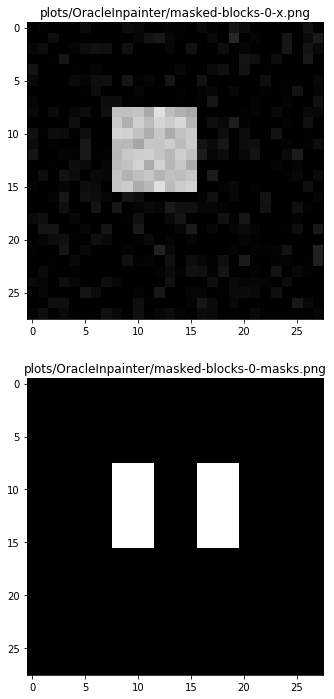

In [3]:
fns = []
fns.append(get_filename('-x'))
fns.append(get_filename('-masks'))

print(fns)
plot_im(fns, title=fns, figsize=(6, 6))


plots/OracleInpainter/masked-blocks-0.png


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26545af2b0>)

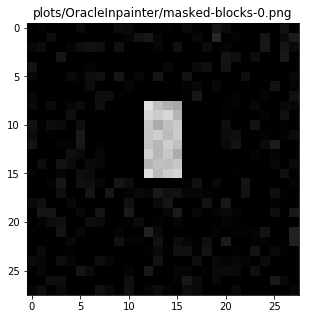

In [4]:
fn = get_filename('')
print(fn)
plot_im(fn, title=fn)

['plots/OracleInpainter/masked-blocks-0-x.png', 'plots/OracleInpainter/masked-blocks-0.png', 'plots/OracleInpainter/masked-blocks-0-impute.png']


(<Figure size 432x1296 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2654596128>,
       dtype=object))

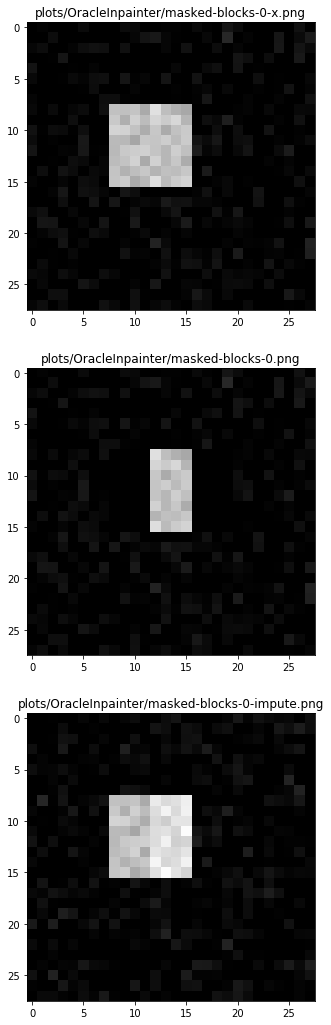

In [5]:
fns = []
fns.append(get_filename('-x'))
fns.append(get_filename(''))
# fns.append(get_filename('-probs'))
fns.append(get_filename('-impute'))

print(fns)
plot_im(fns, title=fns, figsize=(6, 6))
